# <center> PRCP-1023-JohnsHopkinsCovid19


Name : Danita Anubhuti Prakash
### Problem Statement

Task 1:- Prepare a complete data analysis report on the given data. <br>
Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a
predictive model to forecast the Covid19 cases based on past cases for a
specific country or region.
<br>
Task3:- Make suggestions to the government health department of the
country/region for preparation based on your predictions.

## Importing Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Understanding the Data used

In [2]:
covid19_confirmed = pd.read_csv("covid19_confirmed.csv")
covid19_deaths = pd.read_csv("covid19_deaths.csv")
covid19_recovered = pd.read_csv("covid19_recovered.csv")

In [3]:
covid19_confirmed.shape
covid19_confirmed.describe()
#covid19_confirmed.isnull().sum()
#covid19_confirmed.dropna(inplace = True)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [4]:
covid19_deaths.shape
covid19_deaths.describe()
#covid19_deaths.isnull().sum()
#covid19_deaths.dropna(inplace = True)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.076624,22.829441,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,...,3459.515038,3473.206767,3489.860902,3514.481203,3536.109023,3556.620301,3578.071429,3597.740602,3611.635338,3622.906015
std,24.904600,70.191330,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,...,16398.950919,16453.471108,16510.259597,16636.850630,16739.311674,16831.543769,16934.234212,17019.787840,17068.307397,17102.864472
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,57.000000,57.000000,58.000000,59.000000,60.500000,61.500000,62.500000,64.000000,64.500000
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,588.000000,588.250000,611.500000,620.500000,620.500000,622.500000,629.000000,635.750000,645.500000,647.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,193693.000000,194071.000000,194493.000000,195781.000000,196763.000000,197633.000000,198570.000000,199282.000000,199509.000000,199865.000000


In [5]:
covid19_recovered.shape
covid19_recovered.describe()
#covid19_recovered.isnull().sum()
#covid19_recovered.dropna(inplace = True)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,19.835137,27.997068,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,...,7.683461e+04,7.756891e+04,7.847586e+04,7.936355e+04,8.026853e+04,8.113512e+04,8.213040e+04,8.307036e+04,8.400322e+04,8.456361e+04
std,24.504550,67.358197,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,...,3.738531e+05,3.774536e+05,3.831228e+05,3.886656e+05,3.941652e+05,3.993233e+05,4.045893e+05,4.106165e+05,4.159772e+05,4.178944e+05
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.428055,-8.224500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.680000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.800000e+02,3.800000e+02
50%,21.521757,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.991000e+03,1.991000e+03,2.071000e+03,2.094000e+03,2.104000e+03,2.112000e+03,2.128000e+03,2.197000e+03,2.239000e+03,2.369000e+03
75%,39.305400,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.997900e+04,2.008200e+04,2.120600e+04,2.153600e+04,2.175200e+04,2.266200e+04,2.316000e+04,2.336400e+04,2.336400e+04,2.336400e+04
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,3.723206e+06,3.780107e+06,3.859399e+06,3.942360e+06,4.025079e+06,4.112551e+06,4.208431e+06,4.303043e+06,4.396399e+06,4.396399e+06


In [6]:
covid19_confirmed.shape

(266, 248)

In [7]:
covid19_recovered.shape

(253, 248)

In [8]:
covid19_deaths.shape

(266, 248)

In [9]:
covid19_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [10]:
covid19_recovered[covid19_recovered.duplicated()]# No duplicates found
#covid19_recovered.drop_duplicates(keep='first', inplace=True)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20


## Applying Data Cleaning

In [11]:
#JANUARY
covid19_deaths['January'] = covid19_deaths['1/22/20'] + covid19_deaths['1/23/20'] + covid19_deaths['1/24/20'] + covid19_deaths['1/25/20'] + covid19_deaths['1/26/20'] + covid19_deaths['1/27/20'] + covid19_deaths['1/28/20'] + covid19_deaths['1/29/20'] + covid19_deaths['1/30/20'] + covid19_deaths['1/31/20']
covid19_recovered['January'] = covid19_recovered['1/22/20'] + covid19_recovered['1/23/20'] + covid19_recovered['1/24/20'] + covid19_recovered['1/25/20'] + covid19_recovered['1/26/20'] + covid19_recovered['1/27/20'] + covid19_recovered['1/28/20'] + covid19_recovered['1/29/20'] + covid19_recovered['1/30/20'] + covid19_recovered['1/31/20']
covid19_confirmed['January'] = covid19_confirmed['1/22/20'] + covid19_confirmed['1/23/20'] + covid19_confirmed['1/24/20'] + covid19_confirmed['1/25/20'] + covid19_confirmed['1/26/20'] + covid19_confirmed['1/27/20'] + covid19_confirmed['1/28/20'] + covid19_confirmed['1/29/20'] + covid19_confirmed['1/30/20'] + covid19_confirmed['1/31/20']

In [12]:
#FEBRUARY
covid19_deaths['February'] = covid19_deaths['2/1/20'] + covid19_deaths['2/2/20'] + covid19_deaths['2/3/20'] + covid19_deaths['2/4/20'] + covid19_deaths['2/5/20'] + covid19_deaths['2/6/20'] + covid19_deaths['2/7/20'] + covid19_deaths['2/8/20'] + covid19_deaths['2/9/20'] + covid19_deaths['2/10/20'] + covid19_deaths['2/11/20'] + covid19_deaths['2/12/20'] + covid19_deaths['2/13/20'] + covid19_deaths['2/14/20'] + covid19_deaths['2/15/20'] + covid19_deaths['2/16/20'] + covid19_deaths['2/17/20'] + covid19_deaths['2/18/20'] + covid19_deaths['2/19/20'] + covid19_deaths['2/20/20'] + covid19_deaths['2/21/20'] + covid19_deaths['2/22/20'] + covid19_deaths['2/23/20'] + covid19_deaths['2/24/20'] + covid19_deaths['2/25/20'] + covid19_deaths['2/26/20'] + covid19_deaths['2/27/20'] + covid19_deaths['2/28/20'] + covid19_deaths['2/29/20']
covid19_recovered['February'] = covid19_recovered['2/1/20'] + covid19_recovered['2/2/20'] + covid19_recovered['2/3/20'] + covid19_recovered['2/4/20'] + covid19_recovered['2/5/20'] + covid19_recovered['2/6/20'] + covid19_recovered['2/7/20'] + covid19_recovered['2/8/20'] + covid19_recovered['2/9/20'] + covid19_recovered['2/10/20'] + covid19_recovered['2/11/20'] + covid19_recovered['2/12/20'] + covid19_recovered['2/13/20'] + covid19_recovered['2/14/20'] + covid19_recovered['2/15/20'] + covid19_recovered['2/16/20'] + covid19_recovered['2/17/20'] + covid19_recovered['2/18/20'] + covid19_recovered['2/19/20'] + covid19_recovered['2/20/20'] + covid19_recovered['2/21/20'] + covid19_recovered['2/22/20'] + covid19_recovered['2/23/20'] + covid19_recovered['2/24/20'] + covid19_recovered['2/25/20'] + covid19_recovered['2/26/20'] + covid19_recovered['2/27/20'] + covid19_recovered['2/28/20'] + covid19_recovered['2/29/20']
covid19_confirmed['February'] = covid19_confirmed['2/1/20'] + covid19_confirmed['2/2/20'] + covid19_confirmed['2/3/20'] + covid19_confirmed['2/4/20'] + covid19_confirmed['2/5/20'] + covid19_confirmed['2/6/20'] + covid19_confirmed['2/7/20'] + covid19_confirmed['2/8/20'] + covid19_confirmed['2/9/20'] + covid19_confirmed['2/10/20'] + covid19_confirmed['2/11/20'] + covid19_confirmed['2/12/20'] + covid19_confirmed['2/13/20'] + covid19_confirmed['2/14/20'] + covid19_confirmed['2/15/20'] + covid19_confirmed['2/16/20'] + covid19_confirmed['2/17/20'] + covid19_confirmed['2/18/20'] + covid19_confirmed['2/19/20'] + covid19_confirmed['2/20/20'] + covid19_confirmed['2/21/20'] + covid19_confirmed['2/22/20'] + covid19_confirmed['2/23/20'] + covid19_confirmed['2/24/20'] + covid19_confirmed['2/25/20'] + covid19_confirmed['2/26/20'] + covid19_confirmed['2/27/20'] + covid19_confirmed['2/28/20'] + covid19_confirmed['2/29/20']

In [13]:
#MARCH
covid19_deaths['March'] = covid19_deaths['3/1/20'] + covid19_deaths['3/2/20'] + covid19_deaths['3/3/20'] + covid19_deaths['3/4/20'] + covid19_deaths['3/5/20'] + covid19_deaths['3/6/20'] + covid19_deaths['3/7/20'] + covid19_deaths['3/8/20'] + covid19_deaths['3/9/20'] + covid19_deaths['3/10/20'] + covid19_deaths['3/11/20'] + covid19_deaths['3/12/20'] + covid19_deaths['3/13/20'] + covid19_deaths['3/14/20'] + covid19_deaths['3/15/20'] + covid19_deaths['3/16/20'] + covid19_deaths['3/17/20'] + covid19_deaths['3/18/20'] + covid19_deaths['3/19/20'] + covid19_deaths['3/20/20'] + covid19_deaths['3/21/20'] + covid19_deaths['3/22/20'] + covid19_deaths['3/23/20'] + covid19_deaths['3/24/20'] + covid19_deaths['3/25/20'] + covid19_deaths['3/26/20'] + covid19_deaths['3/27/20'] + covid19_deaths['3/28/20'] + covid19_deaths['3/29/20'] + covid19_deaths['3/30/20']+ covid19_deaths['3/31/20']
covid19_recovered['March'] = covid19_recovered['3/1/20'] + covid19_recovered['3/2/20'] + covid19_recovered['3/3/20'] + covid19_recovered['3/4/20'] + covid19_recovered['3/5/20'] + covid19_recovered['3/6/20'] + covid19_recovered['3/7/20'] + covid19_recovered['3/8/20'] + covid19_recovered['3/9/20'] + covid19_recovered['3/10/20'] + covid19_recovered['3/11/20'] + covid19_recovered['3/12/20'] + covid19_recovered['3/13/20'] + covid19_recovered['3/14/20'] + covid19_recovered['3/15/20'] + covid19_recovered['3/16/20'] + covid19_recovered['3/17/20'] + covid19_recovered['3/18/20'] + covid19_recovered['3/19/20'] + covid19_recovered['3/20/20'] + covid19_recovered['3/21/20'] + covid19_recovered['3/22/20'] + covid19_recovered['3/23/20'] + covid19_recovered['3/24/20'] + covid19_recovered['3/25/20'] + covid19_recovered['3/26/20'] + covid19_recovered['3/27/20'] + covid19_recovered['3/28/20'] + covid19_recovered['3/29/20'] + covid19_recovered['3/30/20'] + covid19_recovered['3/31/20']
covid19_confirmed['March'] = covid19_confirmed['3/1/20'] + covid19_confirmed['3/2/20'] + covid19_confirmed['3/3/20'] + covid19_confirmed['3/4/20'] + covid19_confirmed['3/5/20'] + covid19_confirmed['3/6/20'] + covid19_confirmed['3/7/20'] + covid19_confirmed['3/8/20'] + covid19_confirmed['3/9/20'] + covid19_confirmed['3/10/20'] + covid19_confirmed['3/11/20'] + covid19_confirmed['3/12/20'] + covid19_confirmed['3/13/20'] + covid19_confirmed['3/14/20'] + covid19_confirmed['3/15/20'] + covid19_confirmed['3/16/20'] + covid19_confirmed['3/17/20'] + covid19_confirmed['3/18/20'] + covid19_confirmed['3/19/20'] + covid19_confirmed['3/20/20'] + covid19_confirmed['3/21/20'] + covid19_confirmed['3/22/20'] + covid19_confirmed['3/23/20'] + covid19_confirmed['3/24/20'] + covid19_confirmed['3/25/20'] + covid19_confirmed['3/26/20'] + covid19_confirmed['3/27/20'] + covid19_confirmed['3/28/20'] + covid19_confirmed['3/29/20'] + covid19_confirmed['3/30/20'] + covid19_confirmed['3/31/20']

In [14]:
#April
covid19_deaths['April'] = covid19_deaths['4/1/20'] + covid19_deaths['4/2/20'] + covid19_deaths['4/3/20'] + covid19_deaths['4/4/20'] + covid19_deaths['4/5/20'] + covid19_deaths['4/6/20'] + covid19_deaths['4/7/20'] + covid19_deaths['4/8/20'] + covid19_deaths['4/9/20'] + covid19_deaths['4/10/20'] + covid19_deaths['4/11/20'] + covid19_deaths['4/12/20'] + covid19_deaths['4/13/20'] + covid19_deaths['4/14/20'] + covid19_deaths['4/15/20'] + covid19_deaths['4/16/20'] + covid19_deaths['4/17/20'] + covid19_deaths['4/18/20'] + covid19_deaths['4/19/20'] + covid19_deaths['4/20/20'] + covid19_deaths['4/21/20'] + covid19_deaths['4/22/20'] + covid19_deaths['4/23/20'] + covid19_deaths['4/24/20'] + covid19_deaths['4/25/20'] + covid19_deaths['4/26/20'] + covid19_deaths['4/27/20'] + covid19_deaths['4/28/20'] + covid19_deaths['4/29/20'] + covid19_deaths['4/30/20']
covid19_recovered['April'] = covid19_recovered['4/1/20'] + covid19_recovered['4/2/20'] + covid19_recovered['4/3/20'] + covid19_recovered['4/4/20'] + covid19_recovered['4/5/20'] + covid19_recovered['4/6/20'] + covid19_recovered['4/7/20'] + covid19_recovered['4/8/20'] + covid19_recovered['4/9/20'] + covid19_recovered['4/10/20'] + covid19_recovered['4/11/20'] + covid19_recovered['4/12/20'] + covid19_recovered['4/13/20'] + covid19_recovered['4/14/20'] + covid19_recovered['4/15/20'] + covid19_recovered['4/16/20'] + covid19_recovered['4/17/20'] + covid19_recovered['4/18/20'] + covid19_recovered['4/19/20'] + covid19_recovered['4/20/20'] + covid19_recovered['4/21/20'] + covid19_recovered['4/22/20'] + covid19_recovered['4/23/20'] + covid19_recovered['4/24/20'] + covid19_recovered['4/25/20'] + covid19_recovered['4/26/20'] + covid19_recovered['4/27/20'] + covid19_recovered['4/28/20'] + covid19_recovered['4/29/20'] + covid19_recovered['4/30/20'] 
covid19_confirmed['April'] = covid19_confirmed['4/1/20'] + covid19_confirmed['4/2/20'] + covid19_confirmed['4/3/20'] + covid19_confirmed['4/4/20'] + covid19_confirmed['4/5/20'] + covid19_confirmed['4/6/20'] + covid19_confirmed['4/7/20'] + covid19_confirmed['4/8/20'] + covid19_confirmed['4/9/20'] + covid19_confirmed['4/10/20'] + covid19_confirmed['4/11/20'] + covid19_confirmed['4/12/20'] + covid19_confirmed['4/13/20'] + covid19_confirmed['4/14/20'] + covid19_confirmed['4/15/20'] + covid19_confirmed['4/16/20'] + covid19_confirmed['4/17/20'] + covid19_confirmed['4/18/20'] + covid19_confirmed['4/19/20'] + covid19_confirmed['4/20/20'] + covid19_confirmed['4/21/20'] + covid19_confirmed['4/22/20'] + covid19_confirmed['4/23/20'] + covid19_confirmed['4/24/20'] + covid19_confirmed['4/25/20'] + covid19_confirmed['4/26/20'] + covid19_confirmed['4/27/20'] + covid19_confirmed['4/28/20'] + covid19_confirmed['4/29/20'] + covid19_confirmed['4/30/20'] 

In [15]:
#MAY done
covid19_deaths['May'] = covid19_deaths['5/1/20'] + covid19_deaths['5/2/20'] + covid19_deaths['5/3/20'] + covid19_deaths['5/4/20'] + covid19_deaths['5/5/20'] + covid19_deaths['5/6/20'] + covid19_deaths['5/7/20'] + covid19_deaths['5/8/20'] + covid19_deaths['5/9/20'] + covid19_deaths['5/10/20'] + covid19_deaths['5/11/20'] + covid19_deaths['5/12/20'] + covid19_deaths['5/13/20'] + covid19_deaths['5/14/20'] + covid19_deaths['5/15/20'] + covid19_deaths['5/16/20'] + covid19_deaths['5/17/20'] + covid19_deaths['5/18/20'] + covid19_deaths['5/19/20'] + covid19_deaths['5/20/20'] + covid19_deaths['5/21/20'] + covid19_deaths['5/22/20'] + covid19_deaths['5/23/20'] + covid19_deaths['5/24/20'] + covid19_deaths['5/25/20'] + covid19_deaths['5/26/20'] + covid19_deaths['5/27/20'] + covid19_deaths['5/28/20'] + covid19_deaths['5/29/20'] + covid19_deaths['5/30/20']+ covid19_deaths['5/31/20']
covid19_recovered['May'] = covid19_recovered['5/1/20'] + covid19_recovered['5/2/20'] + covid19_recovered['5/3/20'] + covid19_recovered['5/4/20'] + covid19_recovered['5/5/20'] + covid19_recovered['5/6/20'] + covid19_recovered['5/7/20'] + covid19_recovered['5/8/20'] + covid19_recovered['5/9/20'] + covid19_recovered['5/10/20'] + covid19_recovered['5/11/20'] + covid19_recovered['5/12/20'] + covid19_recovered['5/13/20'] + covid19_recovered['5/14/20'] + covid19_recovered['5/15/20'] + covid19_recovered['5/16/20'] + covid19_recovered['5/17/20'] + covid19_recovered['5/18/20'] + covid19_recovered['5/19/20'] + covid19_recovered['5/20/20'] + covid19_recovered['5/21/20'] + covid19_recovered['5/22/20'] + covid19_recovered['5/23/20'] + covid19_recovered['5/24/20'] + covid19_recovered['5/25/20'] + covid19_recovered['5/26/20'] + covid19_recovered['5/27/20'] + covid19_recovered['5/28/20'] + covid19_recovered['5/29/20'] + covid19_recovered['5/30/20'] + covid19_recovered['5/31/20']
covid19_confirmed['May'] = covid19_confirmed['5/1/20'] + covid19_confirmed['5/2/20'] + covid19_confirmed['5/3/20'] + covid19_confirmed['5/4/20'] + covid19_confirmed['5/5/20'] + covid19_confirmed['5/6/20'] + covid19_confirmed['5/7/20'] + covid19_confirmed['5/8/20'] + covid19_confirmed['5/9/20'] + covid19_confirmed['5/10/20'] + covid19_confirmed['5/11/20'] + covid19_confirmed['5/12/20'] + covid19_confirmed['5/13/20'] + covid19_confirmed['5/14/20'] + covid19_confirmed['5/15/20'] + covid19_confirmed['5/16/20'] + covid19_confirmed['5/17/20'] + covid19_confirmed['5/18/20'] + covid19_confirmed['5/19/20'] + covid19_confirmed['5/20/20'] + covid19_confirmed['5/21/20'] + covid19_confirmed['5/22/20'] + covid19_confirmed['5/23/20'] + covid19_confirmed['5/24/20'] + covid19_confirmed['5/25/20'] + covid19_confirmed['5/26/20'] + covid19_confirmed['5/27/20'] + covid19_confirmed['5/28/20'] + covid19_confirmed['5/29/20'] + covid19_confirmed['5/30/20'] + covid19_confirmed['5/31/20']

In [16]:
#JUNE
covid19_deaths['June'] = covid19_deaths['6/1/20'] + covid19_deaths['6/2/20'] + covid19_deaths['6/3/20'] + covid19_deaths['6/4/20'] + covid19_deaths['6/5/20'] + covid19_deaths['6/6/20'] + covid19_deaths['6/7/20'] + covid19_deaths['6/8/20'] + covid19_deaths['6/9/20'] + covid19_deaths['6/10/20'] + covid19_deaths['6/11/20'] + covid19_deaths['6/12/20'] + covid19_deaths['6/13/20'] + covid19_deaths['6/14/20'] + covid19_deaths['6/15/20'] + covid19_deaths['6/16/20'] + covid19_deaths['6/17/20'] + covid19_deaths['6/18/20'] + covid19_deaths['6/19/20'] + covid19_deaths['6/20/20'] + covid19_deaths['6/21/20'] + covid19_deaths['6/22/20'] + covid19_deaths['6/23/20'] + covid19_deaths['6/24/20'] + covid19_deaths['6/25/20'] + covid19_deaths['6/26/20'] + covid19_deaths['6/27/20'] + covid19_deaths['6/28/20'] + covid19_deaths['6/29/20'] + covid19_deaths['5/30/20']
covid19_recovered['June'] = covid19_recovered['6/1/20'] + covid19_recovered['6/2/20'] + covid19_recovered['6/3/20'] + covid19_recovered['6/4/20'] + covid19_recovered['6/5/20'] + covid19_recovered['6/6/20'] + covid19_recovered['6/7/20'] + covid19_recovered['6/8/20'] + covid19_recovered['6/9/20'] + covid19_recovered['6/10/20'] + covid19_recovered['6/11/20'] + covid19_recovered['6/12/20'] + covid19_recovered['6/13/20'] + covid19_recovered['6/14/20'] + covid19_recovered['6/15/20'] + covid19_recovered['6/16/20'] + covid19_recovered['6/17/20'] + covid19_recovered['6/18/20'] + covid19_recovered['6/19/20'] + covid19_recovered['6/20/20'] + covid19_recovered['6/21/20'] + covid19_recovered['6/22/20'] + covid19_recovered['6/23/20'] + covid19_recovered['6/24/20'] + covid19_recovered['6/25/20'] + covid19_recovered['6/26/20'] + covid19_recovered['6/27/20'] + covid19_recovered['6/28/20'] + covid19_recovered['6/29/20'] + covid19_recovered['6/30/20'] 
covid19_confirmed['June'] = covid19_confirmed['6/1/20'] + covid19_confirmed['6/2/20'] + covid19_confirmed['6/3/20'] + covid19_confirmed['6/4/20'] + covid19_confirmed['6/5/20'] + covid19_confirmed['6/6/20'] + covid19_confirmed['6/7/20'] + covid19_confirmed['6/8/20'] + covid19_confirmed['6/9/20'] + covid19_confirmed['6/10/20'] + covid19_confirmed['6/11/20'] + covid19_confirmed['6/12/20'] + covid19_confirmed['6/13/20'] + covid19_confirmed['6/14/20'] + covid19_confirmed['6/15/20'] + covid19_confirmed['6/16/20'] + covid19_confirmed['6/17/20'] + covid19_confirmed['6/18/20'] + covid19_confirmed['6/19/20'] + covid19_confirmed['6/20/20'] + covid19_confirmed['6/21/20'] + covid19_confirmed['6/22/20'] + covid19_confirmed['6/23/20'] + covid19_confirmed['6/24/20'] + covid19_confirmed['6/25/20'] + covid19_confirmed['6/26/20'] + covid19_confirmed['6/27/20'] + covid19_confirmed['6/28/20'] + covid19_confirmed['6/29/20'] + covid19_confirmed['6/30/20'] 

In [17]:
#JULY
covid19_deaths['July'] = covid19_deaths['7/1/20'] + covid19_deaths['7/2/20'] + covid19_deaths['7/3/20'] + covid19_deaths['7/4/20'] + covid19_deaths['7/5/20'] + covid19_deaths['7/6/20'] + covid19_deaths['7/7/20'] + covid19_deaths['7/8/20'] + covid19_deaths['7/9/20'] + covid19_deaths['7/10/20'] + covid19_deaths['7/11/20'] + covid19_deaths['7/12/20'] + covid19_deaths['7/13/20'] + covid19_deaths['7/14/20'] + covid19_deaths['7/15/20'] + covid19_deaths['7/16/20'] + covid19_deaths['7/17/20'] + covid19_deaths['7/18/20'] + covid19_deaths['7/19/20'] + covid19_deaths['7/20/20'] + covid19_deaths['7/21/20'] + covid19_deaths['7/22/20'] + covid19_deaths['7/23/20'] + covid19_deaths['7/24/20'] + covid19_deaths['7/25/20'] + covid19_deaths['7/26/20'] + covid19_deaths['7/27/20'] + covid19_deaths['7/28/20'] + covid19_deaths['7/29/20'] + covid19_deaths['7/30/20']+ covid19_deaths['7/31/20']
covid19_recovered['July'] = covid19_recovered['7/1/20'] + covid19_recovered['7/2/20'] + covid19_recovered['7/3/20'] + covid19_recovered['7/4/20'] + covid19_recovered['7/5/20'] + covid19_recovered['7/6/20'] + covid19_recovered['7/7/20'] + covid19_recovered['7/8/20'] + covid19_recovered['7/9/20'] + covid19_recovered['7/10/20'] + covid19_recovered['7/11/20'] + covid19_recovered['7/12/20'] + covid19_recovered['7/13/20'] + covid19_recovered['7/14/20'] + covid19_recovered['7/15/20'] + covid19_recovered['7/16/20'] + covid19_recovered['7/17/20'] + covid19_recovered['7/18/20'] + covid19_recovered['7/19/20'] + covid19_recovered['7/20/20'] + covid19_recovered['7/21/20'] + covid19_recovered['7/22/20'] + covid19_recovered['7/23/20'] + covid19_recovered['7/24/20'] + covid19_recovered['7/25/20'] + covid19_recovered['7/26/20'] + covid19_recovered['7/27/20'] + covid19_recovered['7/28/20'] + covid19_recovered['7/29/20'] + covid19_recovered['7/30/20'] + covid19_recovered['7/31/20']
covid19_confirmed['July'] = covid19_confirmed['7/1/20'] + covid19_confirmed['7/2/20'] + covid19_confirmed['7/3/20'] + covid19_confirmed['7/4/20'] + covid19_confirmed['7/5/20'] + covid19_confirmed['7/6/20'] + covid19_confirmed['7/7/20'] + covid19_confirmed['7/8/20'] + covid19_confirmed['7/9/20'] + covid19_confirmed['7/10/20'] + covid19_confirmed['7/11/20'] + covid19_confirmed['7/12/20'] + covid19_confirmed['7/13/20'] + covid19_confirmed['7/14/20'] + covid19_confirmed['7/15/20'] + covid19_confirmed['7/16/20'] + covid19_confirmed['7/17/20'] + covid19_confirmed['7/18/20'] + covid19_confirmed['7/19/20'] + covid19_confirmed['7/20/20'] + covid19_confirmed['7/21/20'] + covid19_confirmed['7/22/20'] + covid19_confirmed['7/23/20'] + covid19_confirmed['7/24/20'] + covid19_confirmed['7/25/20'] + covid19_confirmed['7/26/20'] + covid19_confirmed['7/27/20'] + covid19_confirmed['7/28/20'] + covid19_confirmed['7/29/20'] + covid19_confirmed['7/30/20'] + covid19_confirmed['7/31/20']

In [18]:
#AUGUST
covid19_deaths['August'] = covid19_deaths['8/1/20'] + covid19_deaths['8/2/20'] + covid19_deaths['8/3/20'] + covid19_deaths['8/4/20'] + covid19_deaths['8/5/20'] + covid19_deaths['8/6/20'] + covid19_deaths['8/7/20'] + covid19_deaths['8/8/20'] + covid19_deaths['8/9/20'] + covid19_deaths['8/10/20'] + covid19_deaths['8/11/20'] + covid19_deaths['8/12/20'] + covid19_deaths['8/13/20'] + covid19_deaths['8/14/20'] + covid19_deaths['8/15/20'] + covid19_deaths['8/16/20'] + covid19_deaths['8/17/20'] + covid19_deaths['8/18/20'] + covid19_deaths['8/19/20'] + covid19_deaths['8/20/20'] + covid19_deaths['8/21/20'] + covid19_deaths['8/22/20'] + covid19_deaths['8/23/20'] + covid19_deaths['8/24/20'] + covid19_deaths['8/25/20'] + covid19_deaths['8/26/20'] + covid19_deaths['8/27/20'] + covid19_deaths['8/28/20'] + covid19_deaths['8/29/20'] + covid19_deaths['8/30/20']
covid19_recovered['August'] = covid19_recovered['8/1/20'] + covid19_recovered['8/2/20'] + covid19_recovered['8/3/20'] + covid19_recovered['8/4/20'] + covid19_recovered['8/5/20'] + covid19_recovered['8/6/20'] + covid19_recovered['8/7/20'] + covid19_recovered['8/8/20'] + covid19_recovered['8/9/20'] + covid19_recovered['8/10/20'] + covid19_recovered['8/11/20'] + covid19_recovered['8/12/20'] + covid19_recovered['8/13/20'] + covid19_recovered['8/14/20'] + covid19_recovered['8/15/20'] + covid19_recovered['8/16/20'] + covid19_recovered['8/17/20'] + covid19_recovered['8/18/20'] + covid19_recovered['8/19/20'] + covid19_recovered['8/20/20'] + covid19_recovered['8/21/20'] + covid19_recovered['8/22/20'] + covid19_recovered['8/23/20'] + covid19_recovered['8/24/20'] + covid19_recovered['8/25/20'] + covid19_recovered['8/26/20'] + covid19_recovered['8/27/20'] + covid19_recovered['8/28/20'] + covid19_recovered['8/29/20'] + covid19_recovered['8/30/20']
covid19_confirmed['August'] = covid19_confirmed['8/1/20'] + covid19_confirmed['8/2/20'] + covid19_confirmed['8/3/20'] + covid19_confirmed['8/4/20'] + covid19_confirmed['8/5/20'] + covid19_confirmed['8/6/20'] + covid19_confirmed['8/7/20'] + covid19_confirmed['8/8/20'] + covid19_confirmed['8/9/20'] + covid19_confirmed['8/10/20'] + covid19_confirmed['8/11/20'] + covid19_confirmed['8/12/20'] + covid19_confirmed['8/13/20'] + covid19_confirmed['8/14/20'] + covid19_confirmed['8/15/20'] + covid19_confirmed['8/16/20'] + covid19_confirmed['8/17/20'] + covid19_confirmed['8/18/20'] + covid19_confirmed['8/19/20'] + covid19_confirmed['8/20/20'] + covid19_confirmed['8/21/20'] + covid19_confirmed['8/22/20'] + covid19_confirmed['8/23/20'] + covid19_confirmed['8/24/20'] + covid19_confirmed['8/25/20'] + covid19_confirmed['8/26/20'] + covid19_confirmed['8/27/20'] + covid19_confirmed['8/28/20'] + covid19_confirmed['8/29/20'] + covid19_confirmed['8/30/20'] 

In [19]:
#SEPTEMBER
covid19_deaths['September'] = covid19_deaths['9/1/20'] + covid19_deaths['9/2/20'] + covid19_deaths['9/3/20'] + covid19_deaths['9/4/20'] + covid19_deaths['9/5/20'] + covid19_deaths['9/6/20'] + covid19_deaths['9/7/20'] + covid19_deaths['9/8/20'] + covid19_deaths['9/9/20'] + covid19_deaths['9/10/20'] + covid19_deaths['9/11/20'] + covid19_deaths['9/12/20'] + covid19_deaths['9/13/20'] + covid19_deaths['9/14/20'] + covid19_deaths['9/15/20'] + covid19_deaths['9/16/20'] + covid19_deaths['9/17/20'] + covid19_deaths['9/18/20'] + covid19_deaths['9/19/20'] + covid19_deaths['9/20/20'] + covid19_deaths['9/21/20'] 
covid19_recovered['September'] = covid19_recovered['9/1/20'] + covid19_recovered['9/2/20'] + covid19_recovered['9/3/20'] + covid19_recovered['9/4/20'] + covid19_recovered['9/5/20'] + covid19_recovered['9/6/20'] + covid19_recovered['9/7/20'] + covid19_recovered['9/8/20'] + covid19_recovered['9/9/20'] + covid19_recovered['9/10/20'] + covid19_recovered['9/11/20'] + covid19_recovered['9/12/20'] + covid19_recovered['9/13/20'] + covid19_recovered['9/14/20'] + covid19_recovered['9/15/20'] + covid19_recovered['9/16/20'] + covid19_recovered['9/17/20'] + covid19_recovered['9/18/20'] + covid19_recovered['9/19/20'] + covid19_recovered['9/20/20'] + covid19_recovered['9/21/20'] 
covid19_confirmed['September'] = covid19_confirmed['9/1/20'] + covid19_confirmed['9/2/20'] + covid19_confirmed['9/3/20'] + covid19_confirmed['9/4/20'] + covid19_confirmed['9/5/20'] + covid19_confirmed['9/6/20'] + covid19_confirmed['9/7/20'] + covid19_confirmed['9/8/20'] + covid19_confirmed['9/9/20'] + covid19_confirmed['9/10/20'] + covid19_confirmed['9/11/20'] + covid19_confirmed['9/12/20'] + covid19_confirmed['9/13/20'] + covid19_confirmed['9/14/20'] + covid19_confirmed['9/15/20'] + covid19_confirmed['9/16/20'] + covid19_confirmed['9/17/20'] + covid19_confirmed['9/18/20'] + covid19_confirmed['9/19/20'] + covid19_confirmed['9/20/20'] + covid19_confirmed['9/21/20'] 

In [20]:
deaths_df = pd.DataFrame()
recovered_df = pd.DataFrame()
confirmed_df = pd.DataFrame()

## Making new dataframes

In [21]:
deaths_df = pd.concat([#covid19_deaths['Province/State'],
                       #covid19_deaths['Country/Region'],
                       covid19_deaths['January'],
                      covid19_deaths['February'],
                      covid19_deaths['March'],
                      covid19_deaths['April'],
                      covid19_deaths['May'],
                      covid19_deaths['June'],
                      covid19_deaths['July'],
                      covid19_deaths['August']], axis = 1)
deaths_df['Total_deaths'] = deaths_df.sum(axis =1)
deaths_df = pd.concat([covid19_deaths['Province/State'],
                       covid19_deaths['Country/Region'],
                       deaths_df], axis=1)
deaths_df

,Province/State,Country/Region,January,February,March,April,May,June,July,August,Total_deaths
0,NaN,Afghanistan,0,0,29,860,4994,14410,33392,40624,94309
1,NaN,Albania,0,0,91,728,975,1192,3302,6661,12949
2,NaN,Algeria,0,0,324,9197,16901,23334,32720,40918,123394
3,NaN,Andorra,0,0,39,917,1518,1544,1612,1579,7209
4,NaN,Angola,0,0,6,60,85,201,915,2519,3786
...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,0,0,6,51,71,94,1465,3372,5059
262,NaN,Western Sahara,0,0,0,0,6,30,31,30,97
263,NaN,Yemen,0,0,0,2,790,5697,12932,15951,35372
264,NaN,Zambia,0,0,0,62,188,355,2609,7329,10543


In [22]:
recovered_df = pd.concat([#covid19_recovered['Province/State'],
                       #covid19_recovered['Country/Region'],
                       covid19_recovered['January'],
                      covid19_recovered['February'],
                      covid19_recovered['March'],
                      covid19_recovered['April'],
                      covid19_recovered['May'],
                      covid19_recovered['June'],
                      covid19_recovered['July'],
                      covid19_recovered['August']], axis = 1)
recovered_df['Total_recovered'] = recovered_df.sum(axis =1)
recovered_df = pd.concat([covid19_recovered['Province/State'],
                       covid19_recovered['Country/Region'],
                       recovered_df], axis=1)
recovered_df

,Province/State,Country/Region,January,February,March,April,May,June,July,August,Total_recovered
0,NaN,Afghanistan,0,0,26,2927,24129,184768,688117,814349,1714316
1,NaN,Albania,0,0,241,7902,21760,32742,67686,115080,245411
2,NaN,Algeria,0,0,594,24072,109804,233399,467472,795747,1631088
3,NaN,Andorra,0,0,37,5636,18505,23239,24877,25769,98063
4,NaN,Angola,0,0,1,129,466,1668,5708,21212,29184
...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,0,0,208,1707,8724,12527,56636,293049,372851
249,NaN,Western Sahara,0,0,0,40,176,216,248,240,920
250,NaN,Yemen,0,0,0,7,144,5661,21374,29862,57048
251,NaN,Zambia,0,0,0,800,8376,32784,55223,242027,339210


In [23]:
confirmed_df = pd.concat([#covid19_confirmed['Province/State'],
                       #covid19_confirmed['Country/Region'],
                       covid19_confirmed['January'],
                      covid19_confirmed['February'],
                      covid19_confirmed['March'],
                      covid19_confirmed['April'],
                      covid19_confirmed['May'],
                      covid19_confirmed['June'],
                      covid19_confirmed['July'],
                      covid19_confirmed['August']], axis = 1)
confirmed_df['Total_confirmed'] = confirmed_df.sum(axis =1)
confirmed_df = pd.concat([covid19_confirmed['Province/State'],
                       covid19_confirmed['Country/Region'],
                       confirmed_df], axis=1)
confirmed_df

,Province/State,Country/Region,January,February,March,April,May,June,July,August,Total_confirmed
0,NaN,Afghanistan,0,6,1219,27237,225655,750884,1077445,1124885,3207331
1,NaN,Albania,0,0,2232,15632,28873,50880,119660,220765,438042
2,NaN,Algeria,0,5,4823,69497,211394,337819,674286,1140582,2438406
3,NaN,Andorra,0,0,2787,19106,23498,25511,27174,30206,128282
4,NaN,Angola,0,0,48,601,1639,4660,20049,56506,83503
...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,0,0,1355,8597,12240,25938,230938,496852,775920
262,NaN,Western Sahara,0,0,0,142,210,279,310,300,1241
263,NaN,Yemen,0,0,0,31,4115,23264,46638,55653,129701
264,NaN,Zambia,0,0,194,1754,18622,40038,90582,278873,430063


## Data frame representing deaths and confirmed cases region wise

In [24]:
covid_2020_df = pd.DataFrame()

In [25]:
covid_2020_df = pd.concat([ covid19_deaths['Province/State'],
                               covid19_deaths['Country/Region'],
                            confirmed_df['Total_confirmed'],
                            deaths_df['Total_deaths'],
                             recovered_df['Total_recovered']
                             ], axis = 1)
covid_2020_df

,Province/State,Country/Region,Total_confirmed,Total_deaths,Total_recovered
0,NaN,Afghanistan,3207331,94309,1714316.0
1,NaN,Albania,438042,12949,245411.0
2,NaN,Algeria,2438406,123394,1631088.0
3,NaN,Andorra,128282,7209,98063.0
4,NaN,Angola,83503,3786,29184.0
...,...,...,...,...,...
261,NaN,West Bank and Gaza,775920,5059,NaN
262,NaN,Western Sahara,1241,97,NaN
263,NaN,Yemen,129701,35372,NaN
264,NaN,Zambia,430063,10543,NaN


In [26]:
covid_2020_df.to_csv('covid_2020_df.csv', index=False)

In [27]:
recovered_df.to_csv('recovered_df.csv', index=False)

In [28]:
confirmed_df.to_csv('confirmed_df.csv', index=False)

In [29]:
deaths_df.to_csv('deaths_df.csv', index=False)

## EDA Analysis : Task 1

<AxesSubplot:>

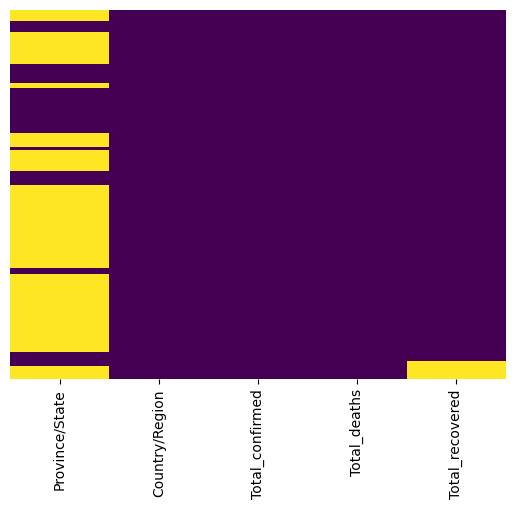

In [30]:
sns.heatmap(covid_2020_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#DATA HAS NO NULL VALUES

<AxesSubplot:>

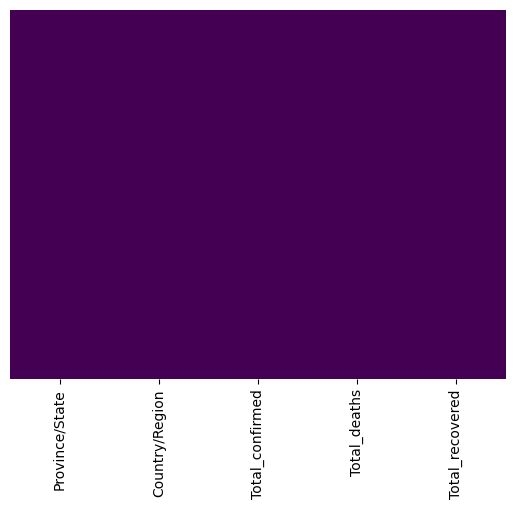

In [31]:
covid_2020_df.dropna(inplace = True)
sns.heatmap(covid_2020_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#DATA HAS NO NULL VALUES

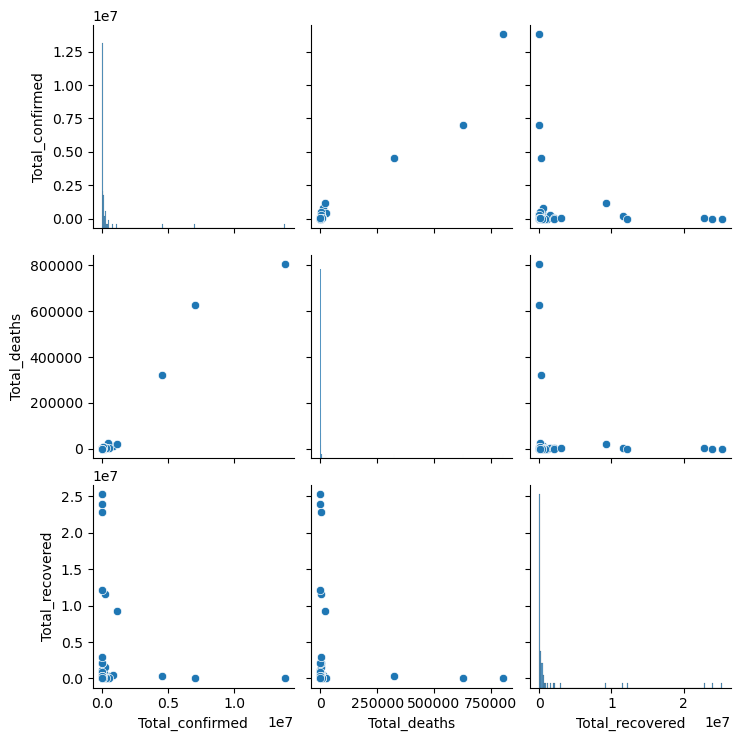

In [32]:
sns.pairplot(covid_2020_df,palette='coolwarm')

<AxesSubplot:>

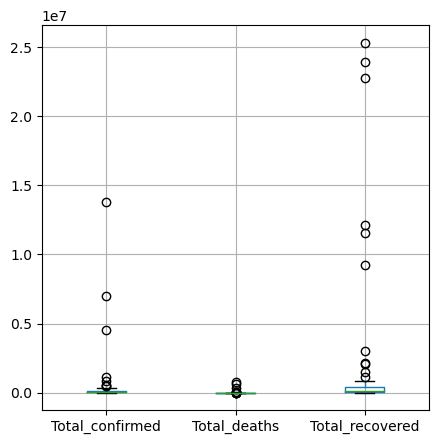

In [33]:
covid_2020_df.boxplot(figsize = (5,5))

<AxesSubplot:>

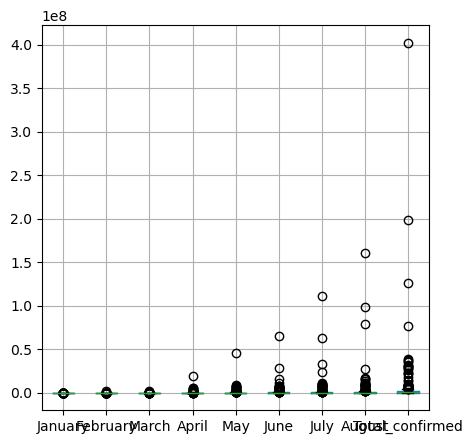

In [34]:
confirmed_df.boxplot(figsize = (5,5))

<AxesSubplot:>

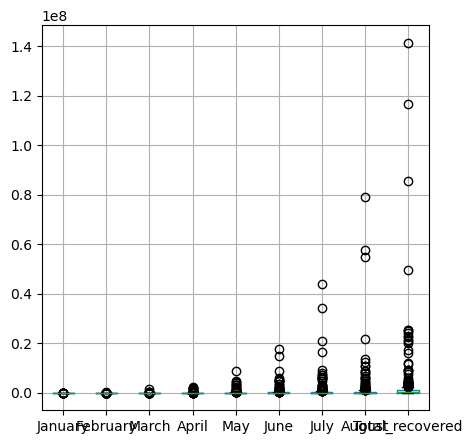

In [35]:
recovered_df.boxplot(figsize = (5,5))

<AxesSubplot:>

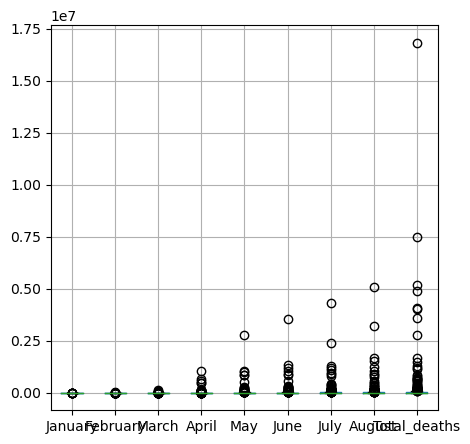

In [36]:
deaths_df.boxplot(figsize = (5,5))

## Using Tabalue to analyze datasets


Graph 1

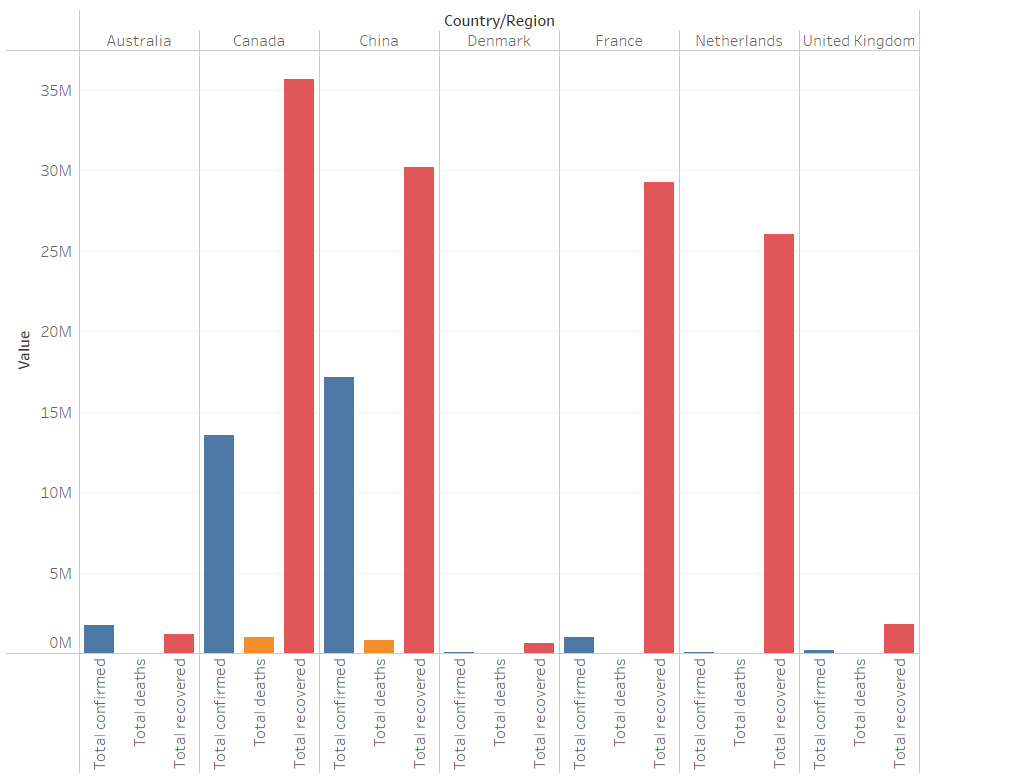

 Graph 2

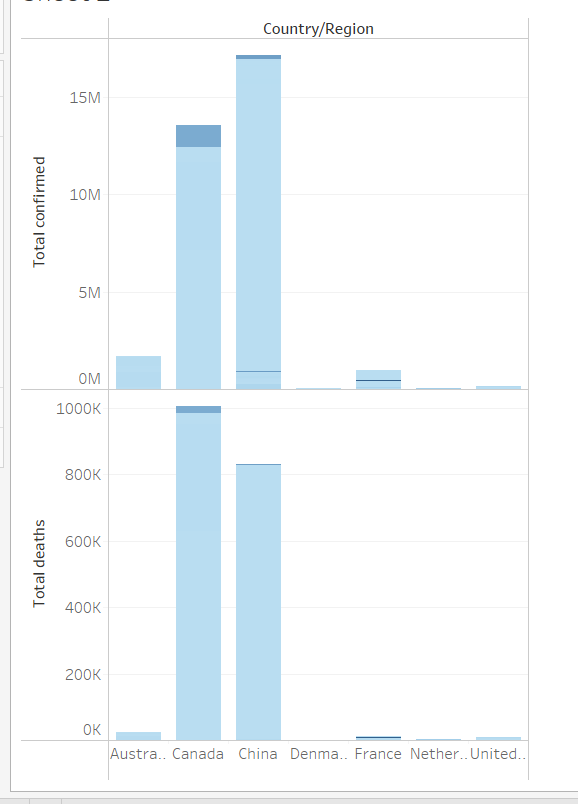

## Task 3

In [37]:
covid_2020_df.corr()

,Total_confirmed,Total_deaths,Total_recovered
Total_confirmed,1.000000,0.978813,-0.052188
Total_deaths,0.978813,1.000000,-0.056276
Total_recovered,-0.052188,-0.056276,1.000000


In [38]:
covid_2020_df

,Province/State,Country/Region,Total_confirmed,Total_deaths,Total_recovered
8,Australian Capital Territory,Australia,17016,441,15001.0
9,New South Wales,Australia,517575,6786,371197.0
10,Northern Territory,Australia,4653,0,3834.0
11,Queensland,Australia,166393,899,143483.0
12,South Australia,Australia,69877,576,61061.0
...,...,...,...,...,...
248,British Virgin Islands,United Kingdom,1308,134,372851.0
249,Cayman Islands,United Kingdom,22814,168,920.0
250,Channel Islands,United Kingdom,83886,6187,57048.0
251,Falkland Islands (Malvinas),United Kingdom,1825,0,339210.0


In [39]:
confirmed_df.dropna(inplace = True)
recovered_df.dropna(inplace = True)
deaths_df.dropna(inplace = True)

In [40]:
confirmed_df.corr()

,January,February,March,April,May,June,July,August,Total_confirmed
January,1.000000,0.994797,0.993286,0.954457,0.801652,0.710797,0.676428,0.638130,0.839132
February,0.994797,1.000000,0.999801,0.963460,0.812491,0.722064,0.688352,0.651104,0.849974
March,0.993286,0.999801,1.000000,0.967089,0.819893,0.730726,0.697566,0.661038,0.856749
April,0.954457,0.963460,0.967089,1.000000,0.937899,0.879219,0.854868,0.825174,0.958795
May,0.801652,0.812491,0.819893,0.937899,1.000000,0.989342,0.978610,0.959361,0.996076
June,0.710797,0.722064,0.730726,0.879219,0.989342,1.000000,0.996785,0.982886,0.976978
July,0.676428,0.688352,0.697566,0.854868,0.978610,0.996785,1.000000,0.993117,0.966828
August,0.638130,0.651104,0.661038,0.825174,0.959361,0.982886,0.993117,1.000000,0.949498
Total_confirmed,0.839132,0.849974,0.856749,0.958795,0.996076,0.976978,0.966828,0.949498,1.000000


In [41]:
recovered_df.corr()

,January,February,March,April,May,June,July,August,Total_recovered
January,1.000000,0.996149,0.996778,0.996507,0.995613,0.994974,0.992184,0.975891,0.994600
February,0.996149,1.000000,0.998114,0.997100,0.995755,0.994978,0.991867,0.975003,0.994792
March,0.996778,0.998114,1.000000,0.999694,0.998626,0.998015,0.995242,0.979269,0.997729
April,0.996507,0.997100,0.999694,1.000000,0.999524,0.999036,0.996602,0.982270,0.998772
May,0.995613,0.995755,0.998626,0.999524,1.000000,0.999777,0.997618,0.984082,0.999194
June,0.994974,0.994978,0.998015,0.999036,0.999777,1.000000,0.998524,0.985935,0.999473
July,0.992184,0.991867,0.995242,0.996602,0.997618,0.998524,1.000000,0.992319,0.999320
August,0.975891,0.975003,0.979269,0.982270,0.984082,0.985935,0.992319,1.000000,0.989908
Total_recovered,0.994600,0.994792,0.997729,0.998772,0.999194,0.999473,0.999320,0.989908,1.000000


In [42]:
deaths_df.corr()

,January,February,March,April,May,June,July,August,Total_deaths
January,1.000000,0.999890,0.999871,0.974630,0.754797,0.608310,0.575280,0.568041,0.748287
February,0.999890,1.000000,0.999992,0.974827,0.755093,0.608619,0.575594,0.568372,0.748581
March,0.999871,0.999992,1.000000,0.975367,0.756568,0.610353,0.577379,0.570178,0.750046
April,0.974630,0.974827,0.975367,1.000000,0.881357,0.767832,0.740888,0.734912,0.875924
May,0.754797,0.755093,0.756568,0.881357,1.000000,0.978985,0.969825,0.967117,0.999544
June,0.608310,0.608619,0.610353,0.767832,0.978985,1.000000,0.999144,0.997951,0.981583
July,0.575280,0.575594,0.577379,0.740888,0.969825,0.999144,1.000000,0.999270,0.972954
August,0.568041,0.568372,0.570178,0.734912,0.967117,0.997951,0.999270,1.000000,0.970622
Total_deaths,0.748287,0.748581,0.750046,0.875924,0.999544,0.981583,0.972954,0.970622,1.000000


## Task 2 : Bulding a Predictive Model

In [43]:
covid_2020_df = covid_2020_df.drop(['Province/State'], axis = 1)
covid_2020_df = covid_2020_df.drop(['Country/Region'], axis = 1)

In [44]:
x = covid_2020_df.drop(columns = 'Total_recovered', axis=1)
y = covid_2020_df['Total_recovered']

In [45]:
x

,Total_confirmed,Total_deaths
8,17016,441
9,517575,6786
10,4653,0
11,166393,899
12,69877,576
...,...,...
248,1308,134
249,22814,168
250,83886,6187
251,1825,0


In [46]:
y

8       15001.0
9      371197.0
10       3834.0
11     143483.0
12      61061.0
         ...   
248    372851.0
249       920.0
250     57048.0
251    339210.0
252    105470.0
Name: Total_recovered, Length: 78, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=51)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
lm.coef_

array([ 0.33132235, -8.22947326])

In [52]:
predictions = lm.predict( x_test)

Text(0, 0.5, 'Predicted Y')

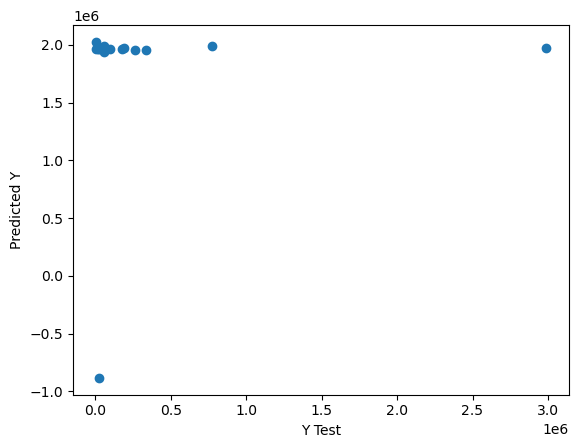

In [53]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Insights of Data Analysis

1. The analysis shows that spreading period was more in first 6 months which gave rise to more confirmed cases in the later months.
2. The graph between confirmed cases and deaths follows a linear patten. That means that as confirmed cases raise more deaths are observered.
3. While the graph for the recovery rates stay constant through out the year.
4. Overall the total recovery cases are more than total deaths for year 2020 while the median remains same for all of them for all the months.
5. Many countries suffered due to covid but china and canada seem to be leading in number of confirmed cases.
6. But the recovery rates are also high in china and canada followed by netherlands and frace
7.It seems that some countries even have wrong inputs as recovered cases are more than confirmed in Netherlands, frace , UK which needs more insights.
8. Other countries like Australia are having good number of recovery and confirmed cases ration with having almost null death rates.


## Problems while doing Analysis

1. Data Cleaning
2. Understanding the structure of the data and making it more usable.
3. For this I did summation of coloumns and arranged it according to months which was previously mentioned as dates
4. Also made a new dataframe which has information of all previous dataframes and removed missing values.
5. Making the model is hard as could not understand the target and features.
6. Data Analysis on the new dataframe worked well in tablaue compared to pandas

## Implications for Government Hospitals

1. It is clear that total death rates has a higher correlation with confirmed cases
2. As more and more cases are confirmed the chances of having deaths increases. 
3. It is important to understand how many cases are coming to take proper and ampt actions at the right time to get less death rates.
4. The recovery rates are constant through out the period in 2020. It is important to take actions at the righ time to increase recovery rates.
5. The death rates are likely to raise at the end of year more than at the start.